# Análise de Dados da Universidade Federal do Rio Grande do Norte (UFRN)

Equipe: Henrique David de Medeiros (henriquemed101@gmail.com), Lucas Gabriel Matias Paiva (lucasgmpaiva1@gmail.com) e Robert Bleda de Saint George (saintgeorge@uol.com.br)

**1.0 - Objetivo**

   O Presente trabalho tem como objetivo fazer uma análise dos dados dos alunos matriculados no curso de Bacharelado de Tecnologia da Informação - BTI da Universidade Federal do Rio Grande do Norte, no período de 2014.1 a 2017.1. A partir dos dados disponibilizados pela universidade, está análise pretende mostrar o comportamento do perfil socioeconômico dos alunos, levando-se em conta a origem de suas formações anteriores à universidade, escola pública, particular ou mista, a faixa de renda declarada. Estabelecer um comparativo destes fatores com seus desempenhos universitários.
   
   Queremos verificar se estes fatores, de alguma forma, influenciam os rendimentos acadêmicos, e em caso positivo o tamanho deste impacto. Além disto pretendemos analisar a tendência do perfil socioeconômico num período fortemente impactante pelos fatos políticos que têm afetado o país.   
   
   
**2.0 - Metodologia**

**2.1 - Plataformas**

   As plataformas utilizadas foram o Anaconda navigator e o Jupyter Notebook, e as funções desenvolvidas em linguagem Python 3, com as bibliotecas numpy, pandas, matplotlib e seaborn.


In [404]:
#Bibliotecas Necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange

**2.2 - Dados**
   
   Os dados foram obtidos do site da UFRN http://dados.ufrn.br, onde foram baixados em cada período letivo de 2014.1 a 2017.1. As seguintes bases de dados, "dados socioeconômicos dos alunos","dados referente à matriculas em componentes curriculares", serviram de fonte para o estudo em questão. 
   
   O estudo separou as rendas declaradas no perfil socioeconômico em classes, visando comparar com a informação sobre a os alunos vindos de escolas públicas, particulares e mistas. Por fim analisou estes fatores em comparação com os desempenhos acadêmicos.
   
**3.0 - Manipulação dos Dados**

   Uma vez baixados, os dados foram manipulados de modo a que se obtivesse a informação desejada. Em cada célula abaixo está um comentário informando o andamento de cada fase do processo.
   
**3.1 - Leitura dos dados**

In [405]:
#Criando DataFrames de Socioeconômico

dadosSocio_2017_1 = pd.read_csv("data/dados-socio-economicos-20171", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_2 = pd.read_csv("data/dados-socio-economicos-20162", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_1 = pd.read_csv("data/dados-socio-economicos-20161", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_2 = pd.read_csv("data/dados-socio-economicos-20152", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_1 = pd.read_csv("data/dados-socio-economicos-20151", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_2 = pd.read_csv("data/dados-socio-economicos-20142.csv", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_1 = pd.read_csv("data/dados-socio-economicos-20141.csv", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);


In [406]:
#Criando DataFrames de Situações

dadosSituacao_2017_1 = pd.read_csv("data/matricula-componente-20171", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_2 = pd.read_csv("data/matriculas-de-2016.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_1 = pd.read_csv("data/matriculas-de-2016.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_2 = pd.read_csv("data/matriculas-de-2015.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_1 = pd.read_csv("data/matriculas-de-2015.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_2 = pd.read_csv("data/matricula-componente-20142.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_1 = pd.read_csv("data/matricula-componente-20141.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);

In [407]:
#Preparando Os Dados
lista_Socio = [dadosSocio_2014_1, dadosSocio_2014_2, dadosSocio_2015_1, dadosSocio_2015_2, dadosSocio_2016_1, dadosSocio_2016_2, dadosSocio_2017_1]

for data in lista_Socio:
  data.rename(columns={"id_discente" : "discente"}, inplace=True)
  
dadosSocio_2017_1.columns

Index(['discente', 'ano', 'periodo', 'renda', 'escola_ens_medio'], dtype='object')

In [408]:
# Obter dados apenas do IMD.

dadosSituacao_2017_1 = dadosSituacao_2017_1[dadosSituacao_2017_1.id_curso==92127264]
dadosSituacao_2016_2 = dadosSituacao_2016_2[dadosSituacao_2016_2.id_curso==92127264]
dadosSituacao_2016_1 = dadosSituacao_2016_1[dadosSituacao_2016_1.id_curso==92127264]
dadosSituacao_2015_2 = dadosSituacao_2015_2[dadosSituacao_2015_2.id_curso==92127264]
dadosSituacao_2015_1 = dadosSituacao_2015_1[dadosSituacao_2015_1.id_curso==92127264]
dadosSituacao_2014_2 = dadosSituacao_2014_2[dadosSituacao_2014_2.id_curso==92127264]
dadosSituacao_2014_1 = dadosSituacao_2014_1[dadosSituacao_2014_1.id_curso==92127264]

In [409]:
#Unindo Dados De Cada Período

dados_2017_1 = pd.merge(dadosSocio_2017_1, dadosSituacao_2017_1, on='discente')
dados_2016_2 = pd.merge(dadosSocio_2016_2, dadosSituacao_2016_2, on='discente')
dados_2016_1 = pd.merge(dadosSocio_2016_1, dadosSituacao_2016_1, on='discente')
dados_2015_2 = pd.merge(dadosSocio_2015_2, dadosSituacao_2015_2, on='discente')
dados_2015_1 = pd.merge(dadosSocio_2015_1, dadosSituacao_2015_1, on='discente')
dados_2014_2 = pd.merge(dadosSocio_2014_2, dadosSituacao_2014_2, on='discente')
dados_2014_1 = pd.merge(dadosSocio_2014_1, dadosSituacao_2014_1, on='discente')

dados_2017_1 = dados_2017_1[~dados_2017_1.discente.duplicated()]
dados_2016_2 = dados_2016_2[~dados_2016_2.discente.duplicated()]
dados_2016_1 = dados_2016_1[~dados_2016_1.discente.duplicated()]
dados_2015_2 = dados_2015_2[~dados_2015_2.discente.duplicated()]
dados_2015_1 = dados_2015_1[~dados_2015_1.discente.duplicated()]
dados_2014_2 = dados_2014_2[~dados_2014_2.discente.duplicated()]
dados_2014_1 = dados_2014_1[~dados_2014_1.discente.duplicated()]

lista_Dados = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for data in lista_Dados:
  data.dropna()
  
dados_2017_1.reset_index(drop=True, inplace=True)
dados_2016_2.reset_index(drop=True, inplace=True)
dados_2016_1.reset_index(drop=True, inplace=True)
dados_2015_2.reset_index(drop=True, inplace=True)
dados_2015_1.reset_index(drop=True, inplace=True)
dados_2014_2.reset_index(drop=True, inplace=True)
dados_2014_1.reset_index(drop=True, inplace=True)

In [410]:
# Atribui a cada discente uma classe

dados_gerais = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for i in dados_gerais:
    i["classe"] = pd.cut(i["renda"],
       bins=[714,1024,1541,2565,4418,8418,12926, 27500],
      labels=["D","C2","C1","B2","B1","A2", "A1"],
      include_lowest=True)
    
# Classe A1 < 27500
# Classe A2 < 12926
# Classe B1 < 8418
# Classe B2 < 4415
# Classe C1 < 2565
# Classe C2 < 1024
# Classe D < 714

**3.3 - Preparação dos dados referentes às escolas de origem**

In [412]:
dados_escola_publica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2017_1
dados_escola_privada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2017_1

dados_escola_publica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2016_2
dados_escola_privada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2016_2

dados_escola_publica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2016_1
dados_escola_privada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2016_1

dados_escola_publica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2015_2
dados_escola_privada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2015_2

dados_escola_publica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2015_1
dados_escola_privada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2015_1

dados_escola_publica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2014_2
dados_escola_privada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
dados_escola_privada_2014_2

dados_escola_publica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
dados_escola_publica_2014_1
dados_escola_privada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']

,discente,ano,periodo,renda,escola_ens_medio,id_curso,media_final,descricao,classe
1,8adfd36bd28efb815197f6837af8b2b9,2014,1,10000.0,Todo em escola particular,92127264.0,9.2,APROVADO,A2
7,0b94a8805eba989f442796ed60e1899b,2014,1,12200.0,Todo em escola particular,92127264.0,4.4,REPROVADO,A2
11,b419813a078aae20633c5585127ede87,2014,1,879.0,Todo em escola particular,92127264.0,6.1,APROVADO POR NOTA,D
14,ba5fefd9bd218063b6484ba2916d3bf0,2014,1,6297.0,Todo em escola particular,92127264.0,8.8,APROVADO,B1
15,469b4e52f0fc039742f0d6f50587fd02,2014,1,724.0,Todo em escola particular,92127264.0,6.8,APROVADO POR NOTA,D
17,cdd880f91102e2225425f0f997f824ea,2014,1,3200.0,Todo em escola particular,92127264.0,NaN,TRANCADO,B2
19,2ce029b6fd0871dc31c569e6eaf6a278,2014,1,4200.0,Todo em escola particular,92127264.0,NaN,EXCLUIDA,B2
20,adbe26ddc8bc24ae4ea69b38868715eb,2014,1,7845.0,Todo em escola particular,92127264.0,NaN,DESISTENCIA,B1
23,76a56ad613bcbefabd97dea0dc2d3aa9,2014,1,1300.0,Todo em escola particular,92127264.0,6.7,APROVADO POR NOTA,C2
24,520429428d98dac9b5c94168677d77bd,2014,1,2500.0,Todo em escola particular,92127264.0,5.0,APROVADO POR NOTA,C1


In [413]:
dados_2016_1.pivot_table(index = ['escola_ens_medio', 'descricao'], values=['discente'], aggfunc='count')

discente
escola_ens_medio                                   descricao                                 
Em escola Particular, com bolsa                    APROVADO                                 2
                                                   APROVADO POR NOTA                        7
                                                   INDEFERIDO                               2
                                                   REPROVADO                                1
                                                   REPROVADO POR MÉDIA E POR FALTAS         2
                                                   TRANCADO                                 1
Outro tipo de escola                               CANCELADO                                1
                                                   REPROVADO                                1
Parte em escola pública parte em escola particu... APROVADO                                 2
                                                   APROVADO POR NOTA                        3
                                                   CANCELADO                                1
                                                   INDEFERIDO                               1
                                                   REPROVADO                                1
Todo em escola particular                          APROVADO                                14
                                                   APROVADO POR NOTA                       27
                                                   CANCELADO                               10
                                                   DESISTENCIA                              2
                                                   EXCLUIDA                                 3
                                                   INDEFERIDO                               2
                                                   REPROVADO                               10
                                                   REPROVADO POR MÉDIA E POR FALTAS         5
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 2
Todo em escola publica                             APROVADO                                36
                                                   APROVADO POR NOTA                       43
                                                   CANCELADO                               15
                                                   DESISTENCIA                              3
                                                   EXCLUIDA                                 6
                                                   INDEFERIDO                               7
                                                   REPROVADO                               29
                                                   REPROVADO POR MÉDIA E POR FALTAS        12
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 4

In [414]:
classes = dados_2017_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes.columns = ['20171']
classes["20162"] = dados_2016_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20161"] = dados_2016_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20152"] = dados_2015_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20151"] = dados_2015_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20142"] = dados_2014_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20141"] = dados_2014_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')

classes = classes.transpose()

In [415]:
dados_2017_1.columns

Index(['discente', 'ano', 'periodo', 'renda', 'escola_ens_medio', 'id_curso',
       'media_final', 'descricao', 'classe'],
      dtype='object')

In [416]:
dados_2017_1
classe_escola = pd.DataFrame( columns=['escola_ens_medio','20171', '20161','20162','20151', '20152', '20141', '20142'])
classe_escola['escola_ens_medio'] = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']
total = dados_2017_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20171'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20161'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2016_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20162'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20152'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2015_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
#total
classe_escola['20151'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_2.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20142'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

total = dados_2014_1.pivot_table(index = ['escola_ens_medio'], values=['classe'], aggfunc='count')
total = total.reset_index()
classe_escola['20141'] = pd.merge(classe_escola, total, on='escola_ens_medio')['classe']

classe_escola

,escola_ens_medio,20171,20161,20162,20151,20152,20141,20142
0,Todo em escola publica,215.0,148.0,184.0,71.0,98.0,58.0,47.0
1,Todo em escola privada,9.0,4.0,12.0,5.0,6.0,9.0,6.0
2,Parte em escola pública parte em escola partic...,12.0,15.0,11.0,6.0,11.0,4.0,4.0
3,"Em escola Particular, com bolsa",2.0,1.0,1.0,NaN,1.0,NaN,NaN
4,Outro tipo de escola,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
classe_escola = classe_escola.drop(columns='escola_ens_medio')

In [418]:
classe_escola = classe_escola.T
classe_escola

,0,1,2,3,4
20171,215.0,9.0,12.0,2.0,NaN
20161,148.0,4.0,15.0,1.0,NaN
20162,184.0,12.0,11.0,1.0,NaN
20151,71.0,5.0,6.0,NaN,NaN
20152,98.0,6.0,11.0,1.0,NaN
20141,58.0,9.0,4.0,NaN,NaN
20142,47.0,6.0,4.0,NaN,NaN


In [419]:
classe_escola.columns = ['Todo em escola publica ', 'Todo em escola privada ', 'Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa ', 'Outro tipo de escola ']
class_school = classe_escola.reset_index()
class_school

,index,Todo em escola publica,Todo em escola privada,Parte em escola pública parte em escola particular,"Em escola Particular, com bolsa",Outro tipo de escola
0,20171,215.0,9.0,12.0,2.0,NaN
1,20161,148.0,4.0,15.0,1.0,NaN
2,20162,184.0,12.0,11.0,1.0,NaN
3,20151,71.0,5.0,6.0,NaN,NaN
4,20152,98.0,6.0,11.0,1.0,NaN
5,20141,58.0,9.0,4.0,NaN,NaN
6,20142,47.0,6.0,4.0,NaN,NaN


In [420]:
dados_2017_1

,discente,ano,periodo,renda,escola_ens_medio,id_curso,media_final,descricao,classe
0,f23e5fa8c16da3a0b77a4ed738182750,2017,1,900.0,Todo em escola publica,92127264.0,7.5,APROVADO,D
1,4bc93c30c0827b1ae75821f44c1dba22,2017,1,1460.0,Parte em escola pública parte em escola partic...,92127264.0,6.7,APROVADO POR NOTA,C2
2,925577b2cff079d05d9651797d30a68f,2017,1,1300.0,Todo em escola publica,92127264.0,NaN,INDEFERIDO,C2
3,6125a149ebd757a47b4fc969e7729eae,2017,1,2727.0,Todo em escola publica,92127264.0,5.5,APROVADO POR NOTA,B2
4,cc98fbab3c297d4cf44db9f59c571374,2017,1,4631.0,Todo em escola particular,92127264.0,NaN,CANCELADO,B1
5,30d0cedb660531d7e84ad5a93c554d0f,2017,1,1400.0,Todo em escola publica,92127264.0,NaN,INDEFERIDO,C2
6,06efc18f80e78fadb2e507e467725e73,2017,1,600.0,Todo em escola publica,92127264.0,5.6,APROVADO POR NOTA,NaN
7,c8e90e0cc4925263eb9216005d5cc5d5,2017,1,1000.0,Todo em escola publica,92127264.0,NaN,CANCELADO,D
8,400db7a5cac622448fc7c15b3888974c,2017,1,3000.0,Todo em escola publica,92127264.0,6.4,APROVADO POR NOTA,B2
9,03ca88cc9f359cec048027e4c34845c8,2017,1,4000.0,Parte em escola pública parte em escola partic...,92127264.0,5.8,APROVADO POR NOTA,B2


In [421]:
dados_typ = ["Aprovado", "Reprovado"]

In [422]:
apro_rep = pd.DataFrame(columns=["Aprovados", "Reprovados"])

In [423]:
dados_typ

['Aprovado', 'Reprovado']

In [424]:
dados_2016_1.escola_ens_medio.unique()

array(['Todo em escola publica ', 'Todo em escola particular ',
       'Em escola Particular, com bolsa ',
       'Parte em escola pública parte em escola particular ',
       'Outro tipo de escola '], dtype=object)

**3.4 - Preparação dos dados referentes ao desempenho**

In [425]:
todoEscolaPublica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1[~todoEscolaPublica_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1.to_frame().reset_index()

todoEscolaPublica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2[~todoEscolaPublica_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2.to_frame().reset_index()

todoEscolaPublica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1[~todoEscolaPublica_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1.to_frame().reset_index()

todoEscolaPublica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2[~todoEscolaPublica_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2.to_frame().reset_index()

todoEscolaPublica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1[~todoEscolaPublica_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1.to_frame().reset_index()

todoEscolaPublica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2[~todoEscolaPublica_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2.to_frame().reset_index()

todoEscolaPublica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1[~todoEscolaPublica_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1.to_frame().reset_index()

todoEscolaPrivada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1[~todoEscolaPrivada_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1.to_frame().reset_index()

todoEscolaPrivada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2[~todoEscolaPrivada_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2.to_frame().reset_index()

todoEscolaPrivada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1[~todoEscolaPrivada_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1.to_frame().reset_index()

todoEscolaPrivada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2[~todoEscolaPrivada_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2.to_frame().reset_index()

todoEscolaPrivada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1[~todoEscolaPrivada_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1.to_frame().reset_index()

todoEscolaPrivada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2[~todoEscolaPrivada_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2.to_frame().reset_index()

todoEscolaPrivada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1[~todoEscolaPrivada_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1.to_frame().reset_index()

# ------------------------------- MIDDLE ----------------------------------------

middle_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_1 = middle_2016_1[~middle_2016_1.discente.duplicated()].descricao.value_counts()
middle_2016_1 = middle_2016_1.to_frame().reset_index()

middle_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2016_2 = middle_2016_2[~middle_2016_2.discente.duplicated()].descricao.value_counts()
middle_2016_2 = middle_2016_2.to_frame().reset_index()

middle_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2017_1 = middle_2017_1[~middle_2017_1.discente.duplicated()].descricao.value_counts()
middle_2017_1 = middle_2017_1.to_frame().reset_index()

middle_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_2 = middle_2015_2[~middle_2015_2.discente.duplicated()].descricao.value_counts()
middle_2015_2 = middle_2015_2.to_frame().reset_index()

middle_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2015_1 = middle_2015_1[~middle_2015_1.discente.duplicated()].descricao.value_counts()
middle_2015_1 = middle_2015_1.to_frame().reset_index()

middle_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_2 = middle_2014_2[~middle_2014_2.discente.duplicated()].descricao.value_counts()
middle_2014_2 = middle_2014_2.to_frame().reset_index()

middle_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Parte em escola pública parte em escola particular ']
middle_2014_1 = middle_2014_1[~middle_2014_1.discente.duplicated()].descricao.value_counts()
middle_2014_1 = middle_2014_1.to_frame().reset_index()

#--------------------------------- Particular, com Bolsa ---------------------------------------


bolsa_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_1 = bolsa_2016_1[~bolsa_2016_1.discente.duplicated()].descricao.value_counts()
bolsa_2016_1 = bolsa_2016_1.to_frame().reset_index()

bolsa_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_2 = bolsa_2016_2[~bolsa_2016_2.discente.duplicated()].descricao.value_counts()
bolsa_2016_2 = bolsa_2016_2.to_frame().reset_index()

bolsa_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2017_1 = bolsa_2017_1[~bolsa_2017_1.discente.duplicated()].descricao.value_counts()
bolsa_2017_1 = bolsa_2017_1.to_frame().reset_index()

bolsa_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_2 = bolsa_2015_2[~bolsa_2015_2.discente.duplicated()].descricao.value_counts()
bolsa_2015_2 = bolsa_2015_2.to_frame().reset_index()

bolsa_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_1 = bolsa_2015_1[~bolsa_2015_1.discente.duplicated()].descricao.value_counts()
bolsa_2015_1 = bolsa_2015_1.to_frame().reset_index()

bolsa_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_2 = bolsa_2014_2[~bolsa_2014_2.discente.duplicated()].descricao.value_counts()
bolsa_2014_2 = bolsa_2014_2.to_frame().reset_index()

bolsa_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_1 = bolsa_2014_1[~bolsa_2014_1.discente.duplicated()].descricao.value_counts()
bolsa_2014_1 = bolsa_2014_1.to_frame().reset_index()

#------------------------------------ OUTRAS ESCOLAS ----------------------------------------

other_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Outro tipo de escola ']
other_2016_1 = other_2016_1[~other_2016_1.discente.duplicated()].descricao.value_counts()
other_2016_1 = other_2016_1.to_frame().reset_index()

other_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Outro tipo de escola ']
other_2016_2 = other_2016_2[~other_2016_2.discente.duplicated()].descricao.value_counts()
other_2016_2 = other_2016_2.to_frame().reset_index()

other_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Outro tipo de escola ']
other_2017_1 = other_2017_1[~other_2017_1.discente.duplicated()].descricao.value_counts()
other_2017_1 = other_2017_1.to_frame().reset_index()

other_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Outro tipo de escola ']
other_2015_2 = other_2015_2[~other_2015_2.discente.duplicated()].descricao.value_counts()
other_2015_2 = other_2015_2.to_frame().reset_index()

other_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Outro tipo de escola ']
other_2015_1 = other_2015_1[~other_2015_1.discente.duplicated()].descricao.value_counts()
other_2015_1 = other_2015_1.to_frame().reset_index()

other_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Outro tipo de escola ']
other_2014_2 = other_2014_2[~other_2014_2.discente.duplicated()].descricao.value_counts()
other_2014_2 = other_2014_2.to_frame().reset_index()

other_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Outro tipo de escola ']
other_2014_1 = other_2014_1[~other_2014_1.discente.duplicated()].descricao.value_counts()
other_2014_1 = other_2014_1.to_frame().reset_index()

In [426]:
col_default = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
rows_default = [0,0,0,0,0,0,0,0,0]
tab_default = pd.DataFrame( columns=['index'], data=col_default)

#for i in tab_default['index']:
#    tab_default['2014_1'] = 0
#    tab_default['2014_2'] = 0
#    tab_default['2015_1'] = 0
#    tab_default['2015_2'] = 0
#    tab_default['2016_1'] = 0
#    tab_default['2016_2'] = 0
#    tab_default['2017_1'] = 0


tab_default

,index
0,APROVADO
1,APROVADO POR NOTA
2,EXCLUIDA
3,DESISTENCIA
4,TRANCADO
5,CANCELADO
6,INDEFERIDO
7,REPROVADO
8,REPROVADO POR MÉDIA E POR FALTAS


In [427]:
middle_school

,0,1,2,3,4,5,6
APROVADO,1,1,2,1,2,4,1
APROVADO POR NOTA,4,3,0,3,3,3,6
EXCLUIDA,2,2,5,0,0,0,0
DESISTENCIA,1,0,0,1,0,1,1
TRANCADO,0,0,0,0,0,1,0
CANCELADO,2,0,0,0,1,2,0
INDEFERIDO,0,0,0,0,1,1,0
REPROVADO,0,1,0,2,1,2,2
REPROVADO POR MÉDIA E POR FALTAS,0,0,0,1,0,0,0
Aprovados,1,1,2,1,2,4,1


In [428]:
all_public_school = pd.merge(tab_default, todoEscolaPublica_2014_1, on='index', how='right').fillna(0)
all_public_school =  pd.merge(all_public_school, todoEscolaPublica_2014_2, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_1, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_2, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_1, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_2, on='index', how='right').fillna(0)
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2017_1, on='index', how='right').fillna(0)
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
all_public_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,26.0,8.0,17.0,29.0,36.0,84.0,70
1,APROVADO POR NOTA,18.0,11.0,16.0,33.0,43.0,44.0,69
2,TRANCADO,3.0,1.0,4.0,5.0,4.0,11.0,2
3,CANCELADO,3.0,2.0,4.0,6.0,15.0,17.0,33
4,INDEFERIDO,2.0,1.0,1.0,12.0,7.0,14.0,18
5,REPROVADO,2.0,4.0,6.0,9.0,29.0,7.0,13
6,REPROVADO POR MÉDIA E POR FALTAS,1.0,6.0,3.0,7.0,12.0,11.0,13
7,DESISTENCIA,0.0,0.0,0.0,3.0,3.0,6.0,4
8,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,9


In [429]:
all_private_school = pd.merge(tab_default, todoEscolaPrivada_2014_1, on='index', how='right').fillna(0)
all_private_school =  pd.merge(all_private_school, todoEscolaPrivada_2014_2, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_1, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_2, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_1, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_2, on='index', how='right').fillna(0)
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2017_1, on='index', how='right').fillna(0)
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
all_private_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,9.0,8.0,5.0,22.0,14.0,28.0,34
1,APROVADO POR NOTA,16.0,10.0,5.0,16.0,27.0,15.0,20
2,TRANCADO,2.0,2.0,1.0,4.0,2.0,1.0,1
3,REPROVADO,6.0,4.0,2.0,1.0,10.0,7.0,11
4,REPROVADO POR MÉDIA E POR FALTAS,2.0,2.0,1.0,4.0,5.0,6.0,9
5,DESISTENCIA,0.0,0.0,3.0,1.0,2.0,3.0,8
6,CANCELADO,0.0,0.0,2.0,2.0,10.0,11.0,7
7,INDEFERIDO,0.0,0.0,0.0,8.0,2.0,5.0,8
8,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,5


In [430]:
middle_school = pd.merge(tab_default, middle_2014_1, on='index', how='left').fillna(0)
middle_school =  pd.merge(middle_school, middle_2014_2, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2']
middle_school = pd.merge(middle_school, middle_2015_1, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2015_2, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2016_1, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
middle_school = pd.merge(middle_school, middle_2016_2, on='index', how='left').fillna(0)
middle_school = pd.merge(middle_school, middle_2017_1, on='index', how='left').fillna(0)
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
middle_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,1.0,1.0,2.0,1.0,2.0,4.0,1.0
1,APROVADO POR NOTA,4.0,3.0,0.0,3.0,3.0,3.0,6.0
2,EXCLUIDA,2.0,2.0,5.0,0.0,0.0,0.0,0.0
3,DESISTENCIA,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,TRANCADO,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,CANCELADO,2.0,0.0,0.0,0.0,1.0,2.0,0.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,REPROVADO,0.0,1.0,0.0,2.0,1.0,2.0,2.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [431]:
bolsa_school = pd.merge(tab_default, bolsa_2014_1, on='index', how='left').fillna(0)
bolsa_school =  pd.merge(bolsa_school, bolsa_2014_2, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2']
bolsa_school = pd.merge(bolsa_school, bolsa_2015_1, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2015_2, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2016_1, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
bolsa_school = pd.merge(bolsa_school, bolsa_2016_2, on='index', how='left').fillna(0)
bolsa_school = pd.merge(bolsa_school, bolsa_2017_1, on='index', how='left').fillna(0)
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
bolsa_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,1.0,1.0,3.0,2.0,2.0,5.0,4.0
1,APROVADO POR NOTA,1.0,1.0,1.0,5.0,7.0,3.0,6.0
2,EXCLUIDA,0.0,2.0,2.0,0.0,0.0,0.0,0.0
3,DESISTENCIA,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANCADO,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,CANCELADO,1.0,0.0,0.0,0.0,0.0,2.0,2.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,2.0,2.0,1.0
7,REPROVADO,0.0,0.0,0.0,2.0,1.0,0.0,0.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,1.0,2.0,1.0,0.0


In [432]:
other_school = pd.merge(tab_default, other_2014_1, on='index', how='left').fillna(0)
other_school =  pd.merge(other_school, other_2014_2, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2']
other_school = pd.merge(other_school, other_2015_1, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2015_2, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2016_1, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
other_school = pd.merge(other_school, other_2016_2, on='index', how='left').fillna(0)
other_school = pd.merge(other_school, other_2017_1, on='index', how='left').fillna(0)
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']
other_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,APROVADO POR NOTA,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,DESISTENCIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRANCADO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CANCELADO,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,INDEFERIDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,REPROVADO,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,REPROVADO POR MÉDIA E POR FALTAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
all_public_school

,index,2014_1,2014_2,2015_1,2015_2,2016_1,2016_2,2017_1
0,APROVADO,26.0,8.0,17.0,29.0,36.0,84.0,70
1,APROVADO POR NOTA,18.0,11.0,16.0,33.0,43.0,44.0,69
2,TRANCADO,3.0,1.0,4.0,5.0,4.0,11.0,2
3,CANCELADO,3.0,2.0,4.0,6.0,15.0,17.0,33
4,INDEFERIDO,2.0,1.0,1.0,12.0,7.0,14.0,18
5,REPROVADO,2.0,4.0,6.0,9.0,29.0,7.0,13
6,REPROVADO POR MÉDIA E POR FALTAS,1.0,6.0,3.0,7.0,12.0,11.0,13
7,DESISTENCIA,0.0,0.0,0.0,3.0,3.0,6.0,4
8,EXCLUIDA,0.0,0.0,0.0,0.0,0.0,0.0,9


In [434]:
all_public_school = all_public_school.T
all_public_school.drop(all_public_school.index[0], inplace=True)
all_public_school

,0,1,2,3,4,5,6,7,8
2014_1,26,18,3,3,2,2,1,0,0
2014_2,8,11,1,2,1,4,6,0,0
2015_1,17,16,4,4,1,6,3,0,0
2015_2,29,33,5,6,12,9,7,3,0
2016_1,36,43,4,15,7,29,12,3,0
2016_2,84,44,11,17,14,7,11,6,0
2017_1,70,69,2,33,18,13,13,4,9


In [435]:
all_public_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_public_school = all_public_school.reset_index()
all_public_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,26,18,3,3,2,2,1,0,0
1,2014_2,8,11,1,2,1,4,6,0,0
2,2015_1,17,16,4,4,1,6,3,0,0
3,2015_2,29,33,5,6,12,9,7,3,0
4,2016_1,36,43,4,15,7,29,12,3,0
5,2016_2,84,44,11,17,14,7,11,6,0
6,2017_1,70,69,2,33,18,13,13,4,9


In [436]:
all_private_school = all_private_school.T
all_private_school.drop(all_private_school.index[0], inplace=True)
all_private_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_private_school = all_private_school.reset_index()
all_private_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,9,16,2,6,2,0,0,0,0
1,2014_2,8,10,2,4,2,0,0,0,0
2,2015_1,5,5,1,2,1,3,2,0,0
3,2015_2,22,16,4,1,4,1,2,8,0
4,2016_1,14,27,2,10,5,2,10,2,0
5,2016_2,28,15,1,7,6,3,11,5,0
6,2017_1,34,20,1,11,9,8,7,8,5


In [437]:
middle_school = middle_school.T
middle_school.drop(middle_school.index[0], inplace=True)
middle_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
middle_school = middle_school.reset_index()
middle_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,1,4,2,1,0,2,0,0,0
1,2014_2,1,3,2,0,0,0,0,1,0
2,2015_1,2,0,5,0,0,0,0,0,0
3,2015_2,1,3,0,1,0,0,0,2,1
4,2016_1,2,3,0,0,0,1,1,1,0
5,2016_2,4,3,0,1,1,2,1,2,0
6,2017_1,1,6,0,1,0,0,0,2,0


In [438]:
bolsa_school = bolsa_school.T
bolsa_school.drop(bolsa_school.index[0], inplace=True)
bolsa_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
bolsa_school = bolsa_school.reset_index()
bolsa_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,1,1,0,1,0,1,0,0,0
1,2014_2,1,1,2,0,0,0,0,0,0
2,2015_1,3,1,2,0,0,0,0,0,0
3,2015_2,2,5,0,0,1,0,0,2,1
4,2016_1,2,7,0,0,1,0,2,1,2
5,2016_2,5,3,0,1,0,2,2,0,1
6,2017_1,4,6,0,0,0,2,1,0,0


In [439]:
other_school = other_school.T
other_school.drop(other_school.index[0], inplace=True)
other_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'EXCLUIDA','DESISTENCIA','TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
other_school = other_school.reset_index()
other_school

,index,APROVADO,APROVADO POR NOTA,EXCLUIDA,DESISTENCIA,TRANCADO,CANCELADO,INDEFERIDO,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
0,2014_1,0,0,0,0,0,0,0,0,0
1,2014_2,0,0,0,0,0,0,0,0,0
2,2015_1,0,0,0,0,0,0,0,0,0
3,2015_2,0,1,0,0,0,0,0,0,0
4,2016_1,0,0,0,0,0,1,0,1,0
5,2016_2,0,1,0,0,0,0,0,0,0
6,2017_1,0,1,1,0,0,0,0,0,0


In [440]:
all_public_school["Aprovados"] = all_public_school["APROVADO"] + all_public_school["APROVADO POR NOTA"]
all_public_school["Reprovados"] = all_public_school["REPROVADO"] + all_public_school["REPROVADO POR MÉDIA E POR FALTAS"]

all_private_school["Aprovados"] = all_private_school["APROVADO"] + all_private_school["APROVADO POR NOTA"]
all_private_school["Reprovados"] = all_private_school["REPROVADO"] + all_private_school["REPROVADO POR MÉDIA E POR FALTAS"]

middle_school["Aprovados"] = middle_school["APROVADO"] #+ middle_school["APROVADO POR NOTA"]
middle_school["Reprovados"] = middle_school["REPROVADO"] + middle_school["REPROVADO POR MÉDIA E POR FALTAS"]

bolsa_school["Aprovados"] = bolsa_school["APROVADO"] + bolsa_school["APROVADO POR NOTA"]
bolsa_school["Reprovados"] = bolsa_school["REPROVADO"] + bolsa_school["REPROVADO POR MÉDIA E POR FALTAS"]

other_school["Aprovados"] = other_school["APROVADO"] + other_school["APROVADO POR NOTA"]
other_school["Reprovados"] = other_school["REPROVADO"] + other_school["REPROVADO POR MÉDIA E POR FALTAS"]

**4.0 - Analise dos Dados**

**4.1 - Situação Socieconômica**
   
   As classes socioecnômicas foram divididas de acordo com visão do Instituto Brasileiro de Geografia e Estatística - IBGE, conforme o valor declarado em reais (R$), e ficaram como abaixo:
   
    Classe A1 < 27500
    Classe A2 < 12926
    Classe B1 < 8418
    Classe B2 < 4415
    Classe C1 < 2565
    Classe C2 < 1024
    Classe D < 714
   
   O gráfico 1 mostra o comportamento das classes ao longo do período. Podemos facilmente identificar que as classes "C" e "D" representam o grosso dos nossos alunos matriculados, também podemos ver que a classe "A" tem menor representação.
   
   Observamos ainda que a partir de 2014 tivemos um crescimento expressivo nos quantitativos dos alunos matriculados em quase todas as classes, exceto a classe "A" que oscilou de forma quase estável. Este crescimento pode ter sido influenciado pela consolidação do SISU - Sistema de Seleção Unificada, que foi criado em 2009, mas somente em 2013 foi adotado pela UFRN, mas principalmente pelo início da criação do curso de BTI em 2013, foco do nosso estudo.
   
   A classe "B", entre 2014.2 e 2015.1, apresentou um momento de declínio, mas já em 2015.2 voltou a crescer e se manteve em crescimento. É possível inferir que estes patamares tendam a se estabilizarem nos próximos anos, ou até apresentarem declínio nas classes de menor renda, pois mudanças nos cenários políticos normalmente afetam a educação. Governos de ideologia direita tendem a investir pouco em escola pública afetando diretamente as classe "C" e "D".

In [441]:
classes

classe,D,C2,C1,B2,B1,A2,A1
20171,53,69,83,64,50,9,7
20162,44,55,75,51,37,15,1
20161,43,40,67,48,26,16,1
20152,32,28,49,28,19,11,3
20151,16,23,37,22,9,7,4
20142,19,16,28,16,13,3,0
20141,16,26,27,20,21,4,1


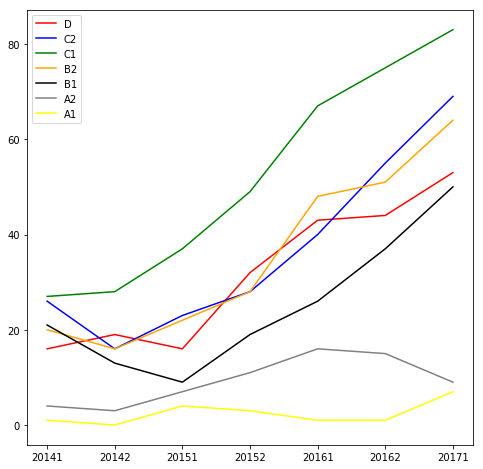

In [442]:
# Geração de gráfico mostrando a quantidade de classes sociais na UFRN com o passar dos anos.

fig, axies12 = plt.subplots(figsize=(8,8))
colors = ['red', 'blue', 'green', 'orange', 'black', 'grey', 'yellow']


for i in range(7):
    start_index = 0;
    end_index = 7;
    subset = classes[start_index:end_index]
    axies12 = plt.plot(subset[classes.columns[i]], c=colors[i])
plt.legend(loc='upper left')

plt.show()


**4.2 - Origem escolar anterior à universidade**
   
   O gráfico 2 mostra a composição das matrículas dos alunos a partir dos tipos de escola das quais vieram. Ao longo do tempo é possível claramente distinguir a predominância de alunos oriundos de escola pública. Em contrapartida alunos vindo das demais escolas representam juntas em torno de 10% daqueles de escola pública.
   
   Este fato entra em perfeita consonância com os dados mostrados no gráfico 1, onde os alunos de baixa renda também são maioria. Isso mostra que independente da renda familiar, da origem escolar, o acesso à universidade pública e gratuita é mérito apenas do aluno. Isso cria oportunidades para aqueles que desde cedo tiveram que lutar com muita dificuldade para concluir os estudos. Agora disputando o mercado de trabalho com mais possibilidades, pois uma formação superior representa um diferencial. 

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Período')

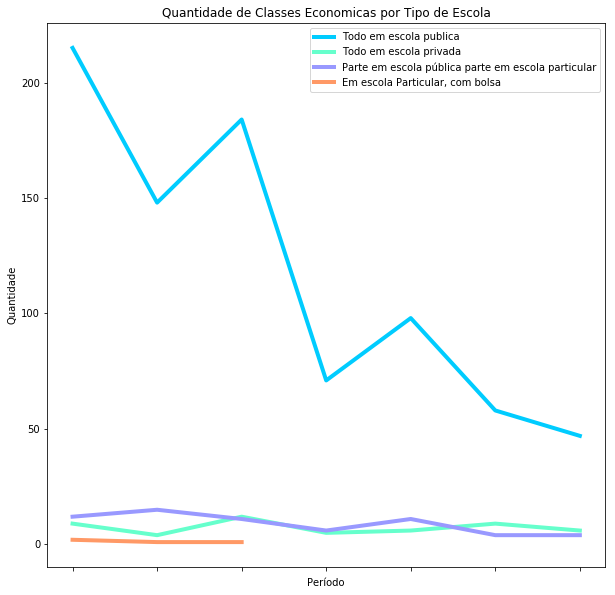

In [446]:
cor1 = (0/255, 204/255, 255/255)
cor2 = (102/255, 255/255, 204/255)
cor3 = (153/255, 153/255, 255/255)
cor4 = (255/255, 153/255, 102/255)
cor5 = (255/255, 102/255, 204/255)

%matplotlib inline
axe = class_school.plot(kind='line',x='index',y=['Todo em escola publica ','Todo em escola privada ','Parte em escola pública parte em escola particular ', 'Em escola Particular, com bolsa '],
                   title='Quantidade de Classes Economicas por Tipo de Escola',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(10,10), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade')
axe.set_xlabel('Período')


**4.3 - Comparativo classe de renda x Origem escolar**
   
   O gráfico 3 mostra um comparativo entre os quantitativos de alunos oriundos da escola pública e escola privada, levando-se em conta as suas faixas de renda ao longo do período.
   
   Pode-se observar que nas faixas de renda "B1" e "B2" encontra-se em torno de 50% para cada grupo de origem pública e privada ao logo de quase todos os períodos. A partir deste ponto bem central aos gráficos para a direita em direção a faixa "A1" os quantitativos de alunos da escola privada superam os quantitativos de alunos da escola pública. Para esquerda em direção a faixa "D" acontece o oposto.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


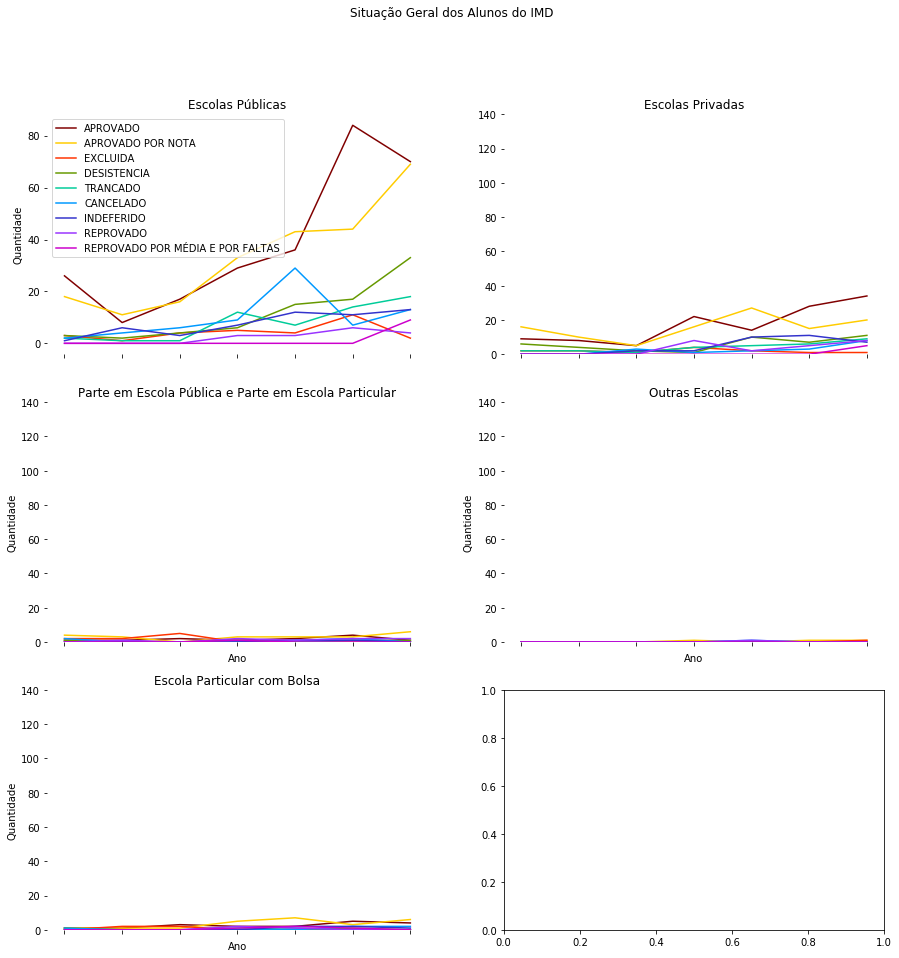

In [443]:
fig_situacao, axies = plt.subplots( ncols=2, nrows=3, figsize=(15,15))

#Cores
cor1 = (128/255,0/255,0/255)
cor2 = (255/255,204/255,0/255)
cor3 = (255/255,51/255,0/255)
cor4 = (102/255,153/255,0/255)
cor5 = (0/255,204/255,153/255)
cor6 = (0/255,153/255,255/255)
cor7 = (51/255,51/255,204/255)
cor8 = (153/255,51/255,255/255)
cor9 = (204/255,0/255,204/255)

def cleanPosicoes():
    posicoes = ['left','right','bottom', 'top']
    for i in range(0,4):
        ax.spines[posicoes[i]].set_visible(False)

ax = all_public_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='Escolas Públicas', ax = axies[0,0])

ax.set_xlabel("")
ax.set_ylabel("Quantidade")
cleanPosicoes()


ax = all_private_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='Escolas Privadas', ax = axies[0,1], legend= False)

ax.set_xlabel("")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = middle_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='Parte em Escola Pública e Parte em Escola Particular', ax = axies[1,0], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = other_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='Outras Escolas', ax = axies[1,1], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = bolsa_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA','EXCLUIDA','DESISTENCIA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS'], 
              color=[cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9], 
              title='Escola Particular com Bolsa', ax = axies[2,0], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

fig_situacao.subplots_adjust(hspace = 0.2)
fig_situacao.suptitle("Situação Geral dos Alunos do IMD")
plt.show()

**4.3 - Desempenho acadêmico**
   
   Com base no gráfico 2 selecionamos para estudo do desempenho acadêmico os alunos originados da escola pública, privada e que tiveram formação parte em cada uma das duas. Por terem os dados mais relevantes separamos cada um em um gráfico próprio.
   
**4.3.1 - Escola pública**
   
   O gráfico 4 mostra o desempenho dos alunos vindos de escola pública, podemos notar que as colunas que representam "aprovação", ao longo do tempo, indicam boa superioridade sobre as que representam "reprovação". Isto sugere um bom desempenho nessa categoria de alunos.
   
   Outro fato que chama a atenção são as colunas que representam "cancelamento" e " reprovação por média e por falta", em 2016.1 estes valores quase se equivaleram aos "aprovados". As "desistências" apresentam crescimento ao longo do período, talvez fosse importante entender o fenômeno.
   

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


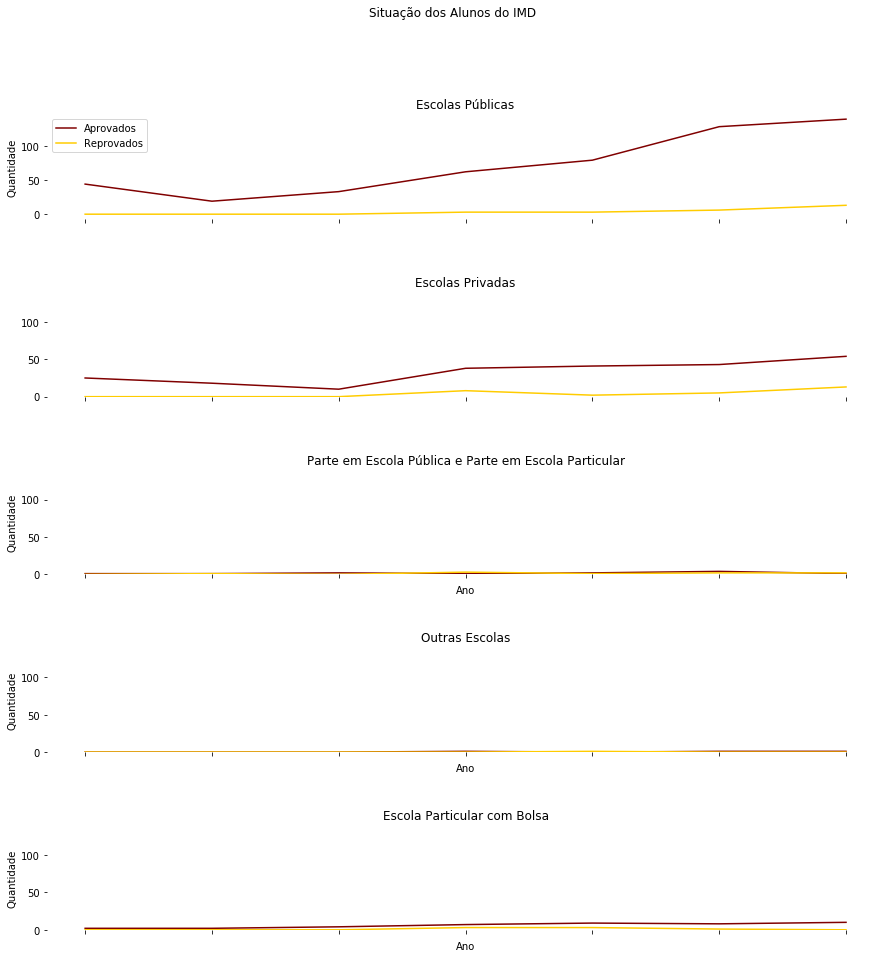

In [444]:
fig_situacao, axies = plt.subplots( ncols=1, nrows=5, figsize=(15,15))

def cleanPosicoes():
    posicoes = ['left','right','bottom', 'top']
    for i in range(0,4):
        ax.spines[posicoes[i]].set_visible(False)

ax = all_public_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=[cor1,cor2], 
              title='Escolas Públicas', ax = axies[0])

ax.set_xlabel("")
ax.set_ylabel("Quantidade")
cleanPosicoes()


ax = all_private_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados' ], 
              color=[cor1,cor2], 
              title='Escolas Privadas', ax = axies[1], legend= False)

ax.set_xlabel("")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = middle_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Parte em Escola Pública e Parte em Escola Particular', ax = axies[2], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = other_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Outras Escolas', ax = axies[3], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

ax = bolsa_school.plot( kind='line', x ='index', y = ['Aprovados', 'Reprovados'], 
              color=[cor1,cor2], 
              title='Escola Particular com Bolsa', ax = axies[4], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 140])
cleanPosicoes()

fig_situacao.subplots_adjust(hspace = 0.7)
fig_situacao.suptitle("Situação dos Alunos do IMD")
plt.show()

In [445]:
class_school

,index,Todo em escola publica,Todo em escola privada,Parte em escola pública parte em escola particular,"Em escola Particular, com bolsa",Outro tipo de escola
0,20171,215.0,9.0,12.0,2.0,NaN
1,20161,148.0,4.0,15.0,1.0,NaN
2,20162,184.0,12.0,11.0,1.0,NaN
3,20151,71.0,5.0,6.0,NaN,NaN
4,20152,98.0,6.0,11.0,1.0,NaN
5,20141,58.0,9.0,4.0,NaN,NaN
6,20142,47.0,6.0,4.0,NaN,NaN


**4.3 - Comparativo classe de renda x Origem escolar**
   
   O gráfico 3 mostra um comparativo entre os quantitativos de alunos oriundos da escola pública e escola privada, levando-se em conta as suas faixas de renda ao longo do período.
   
   Pode-se observar que nas faixas de renda "B1" e "B2" encontra-se em torno de 50% para cada grupo de origem pública e privada ao logo de quase todos os períodos. A partir deste ponto bem central aos gráficos para a direita em direção a faixa "A1" os quantitativos de alunos da escola privada superam os quantitativos de alunos da escola pública. Para esquerda em direção a faixa "D" acontece o oposto.

In [447]:
dados_escola_privada_2017_1

,discente,ano,periodo,renda,escola_ens_medio,id_curso,media_final,descricao,classe
4,cc98fbab3c297d4cf44db9f59c571374,2017,1,4631.0,Todo em escola particular,92127264.0,NaN,CANCELADO,B1
11,fc72d8ee796c35244b10adcfa1847eda,2017,1,4000.0,Todo em escola particular,92127264.0,8.2,APROVADO,B2
12,e5c4303e5a5abd7da69d366ce44edb08,2017,1,5000.0,Todo em escola particular,92127264.0,10.0,APROVADO,B1
14,7629912c85dc9e2141fe596538cf2c02,2017,1,1400.0,Todo em escola particular,92127264.0,7.3,APROVADO,C2
19,52df7a26e3059a52241366146b904b01,2017,1,3000.0,Todo em escola particular,92127264.0,NaN,DESISTENCIA,B2
20,1b723ea570ff87651bed3b7039f4db06,2017,1,14480.0,Todo em escola particular,92127264.0,8.8,APROVADO,A1
22,73c2ec9df7df3db41fc430a063b7dae5,2017,1,4000.0,Todo em escola particular,92127264.0,2.5,REPROVADO,B2
24,f22521f1468c4607428cb63e07441fed,2017,1,4500.0,Todo em escola particular,92127264.0,0.0,REPROVADO POR MÉDIA E POR FALTAS,B1
27,34ebdeb15e47db458796670ce310a1cb,2017,1,1534.0,Todo em escola particular,92127264.0,NaN,INDEFERIDO,C2
28,01520db6ce2ca85f5b119463328ccb93,2017,1,1448.0,Todo em escola particular,92127264.0,0.3,REPROVADO POR MÉDIA E POR FALTAS,C2


In [448]:
dados_escola_2017_1_classe = dados_escola_privada_2017_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2017_1_classe.columns = ['privada']
dados_escola_2017_1_classe['publica'] = dados_escola_publica_2017_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2017_1_classe

dados_escola_2016_2_classe = dados_escola_privada_2016_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_2_classe.columns = ['privada']
dados_escola_2016_2_classe['publica'] = dados_escola_publica_2016_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_2_classe

dados_escola_2016_1_classe = dados_escola_privada_2016_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_1_classe.columns = ['privada']
dados_escola_2016_1_classe['publica'] = dados_escola_publica_2016_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2016_1_classe

dados_escola_2015_2_classe = dados_escola_privada_2015_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_2_classe.columns = ['privada']
dados_escola_2015_2_classe['publica'] = dados_escola_publica_2015_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_2_classe

dados_escola_2015_1_classe = dados_escola_privada_2015_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_1_classe.columns = ['privada']
dados_escola_2015_1_classe['publica'] = dados_escola_publica_2015_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2015_1_classe

dados_escola_2014_2_classe = dados_escola_privada_2014_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_2_classe.columns = ['privada']
dados_escola_2014_2_classe['publica'] = dados_escola_publica_2014_2.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_2_classe

dados_escola_2014_1_classe = dados_escola_privada_2014_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_1_classe.columns = ['privada']
dados_escola_2014_1_classe['publica'] = dados_escola_publica_2014_1.pivot_table(index = 'classe', values='escola_ens_medio', aggfunc='count')
dados_escola_2014_1_classe

,privada,publica
classe,,
D,4,10
C2,5,18
C1,9,15
B2,8,10
B1,14,4
A2,3,1
A1,1,0


In [449]:
dados_escola_2017_1_classe = dados_escola_2017_1_classe.reset_index()
dados_escola_2016_2_classe = dados_escola_2016_2_classe.reset_index()
dados_escola_2016_1_classe = dados_escola_2016_1_classe.reset_index()
dados_escola_2015_2_classe = dados_escola_2015_2_classe.reset_index()
dados_escola_2015_1_classe = dados_escola_2015_1_classe.reset_index()
dados_escola_2014_2_classe = dados_escola_2014_2_classe.reset_index()
dados_escola_2014_1_classe = dados_escola_2014_1_classe.reset_index()

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

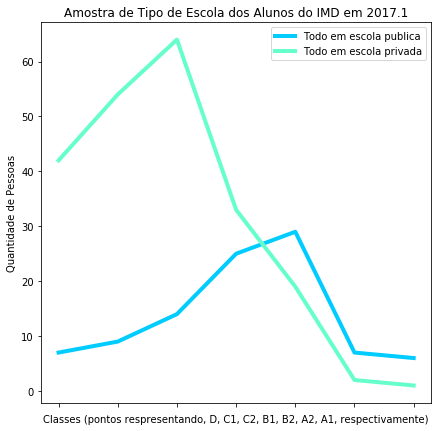

In [450]:
%matplotlib inline
axe = dados_escola_2017_1_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2017.1',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

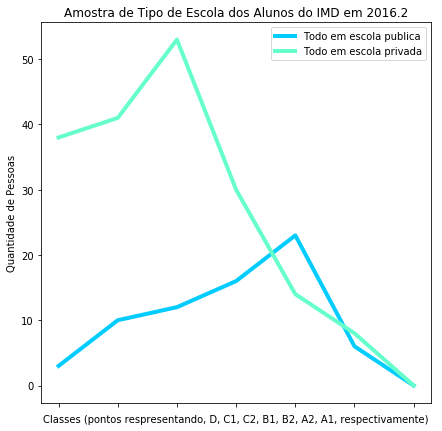

In [451]:
axe = dados_escola_2016_2_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2016.2',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

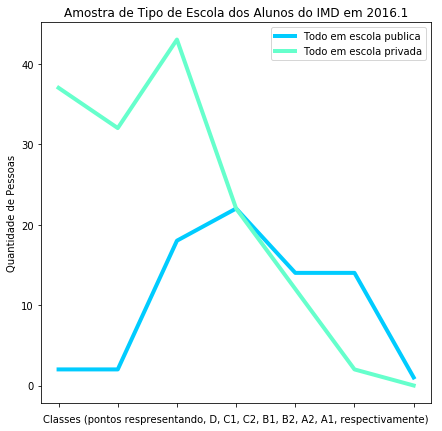

In [452]:
axe = dados_escola_2016_1_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2016.1',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

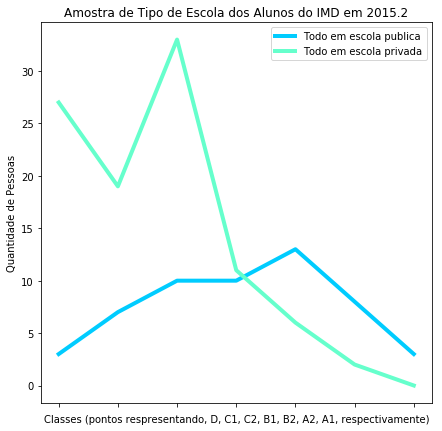

In [453]:
axe = dados_escola_2015_2_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2015.2',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

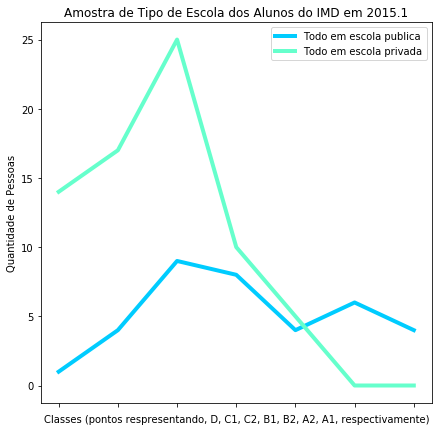

In [454]:
axe = dados_escola_2015_1_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2015.1',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

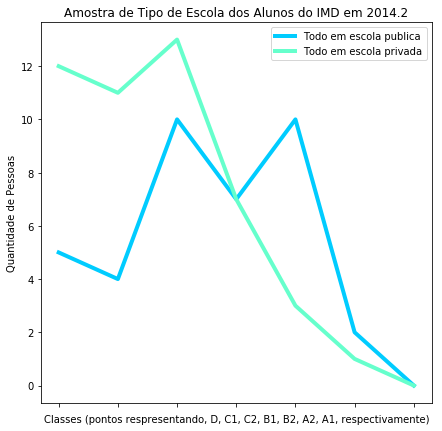

In [455]:
axe = dados_escola_2014_2_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2014.2',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')

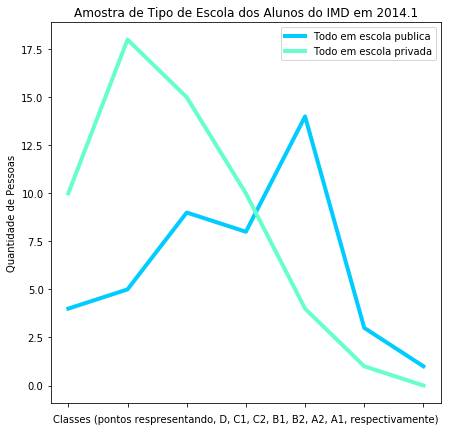

In [456]:
axe = dados_escola_2014_1_classe.plot(kind='line',x='classe',y=['privada','publica'],
                   title='Amostra de Tipo de Escola dos Alunos do IMD em 2014.1',
                   color=[cor1,cor2,cor3,cor4,cor5], figsize=(7,7), linewidth=4)
axe.legend(loc='best', labels=['Todo em escola publica','Todo em escola privada', 'Parte em escola pública parte em escola particular', 'Em escola Particular, com bolsa'])
axe.set_ylabel('Quantidade de Pessoas')
axe.set_xlabel('Classes (pontos respresentando, D, C1, C2, B1, B2, A2, A1, respectivamente)')